In [ ]:
COURSEWORK AML - TASK 1

In [1967]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
import numpy as np
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import SVC
from sklearn import svm,datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc


A) Preprocessing

In [1968]:
#Load the dataset
maternal = pd.read_csv('Maternal Health Risk Data Set.csv')

# Print the first 5 entries
maternal.head(5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [1969]:
# See the number of observations and attributes
maternal.shape[:]


(1014, 7)

In [1970]:
# Check if there is any missing value
maternal.isnull().sum()
maternal.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [1971]:
# Summarize the data
maternal.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [1972]:
# Check the data type of each attribute
maternal.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

In [1973]:
# See the name of columns
maternal.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [1974]:
# Replace RiskLevel column values from nominal to categorical
maternal['RiskLevel'] = maternal['RiskLevel'].replace({'low risk': '1', 'mid risk': '2', 'high risk': '3'})
maternal.head()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,3
1,35,140,90,13.0,98.0,70,3
2,29,90,70,8.0,100.0,80,3
3,30,140,85,7.0,98.0,70,3
4,35,120,60,6.1,98.0,76,1


B) Preliminary Analysis

[Text(0.5, 1.0, 'Number Of Patients In Each Risk Category')]

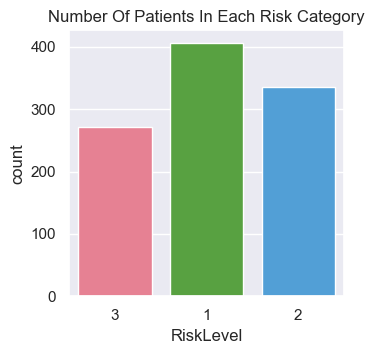

In [1975]:
# Plot the number of patient in each category of Risk Level
plt.figure(figsize=(4,4), dpi=100)
sns.countplot(data=maternal, x="RiskLevel",palette = "husl").set(title="Number Of Patients In Each Risk Category")

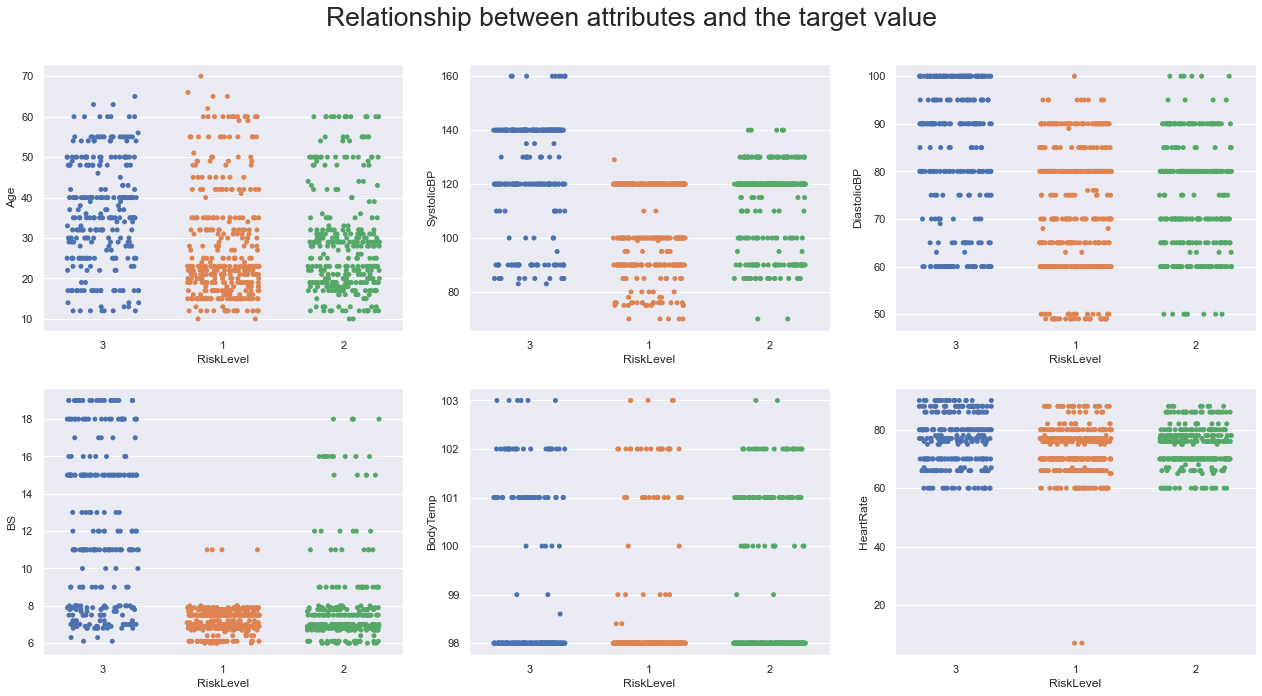

In [1976]:
# Plot all the attributes with the target
fig, axes= plt.subplots(2, 3,figsize=(18, 10))

fig.suptitle('Relationship between attributes and the target value')

fig1 = sns.stripplot(ax=axes[0, 0],x="RiskLevel", y="Age", data=maternal,jitter = 0.30)
fig2 = sns.stripplot(ax=axes[0, 1],x="RiskLevel", y="SystolicBP", data=maternal,jitter = 0.30)
fig3 = sns.stripplot(ax=axes[0, 2],x="RiskLevel", y="DiastolicBP", data=maternal,jitter = 0.30)
fig4 = sns.stripplot(ax=axes[1, 0],x="RiskLevel", y="BS", data=maternal,jitter = 0.30)
fig5 = sns.stripplot(ax=axes[1, 1],x="RiskLevel", y="BodyTemp", data=maternal,jitter = 0.30)
fig6 = sns.stripplot(ax=axes[1, 2],x="RiskLevel", y="HeartRate", data=maternal,jitter = 0.30)

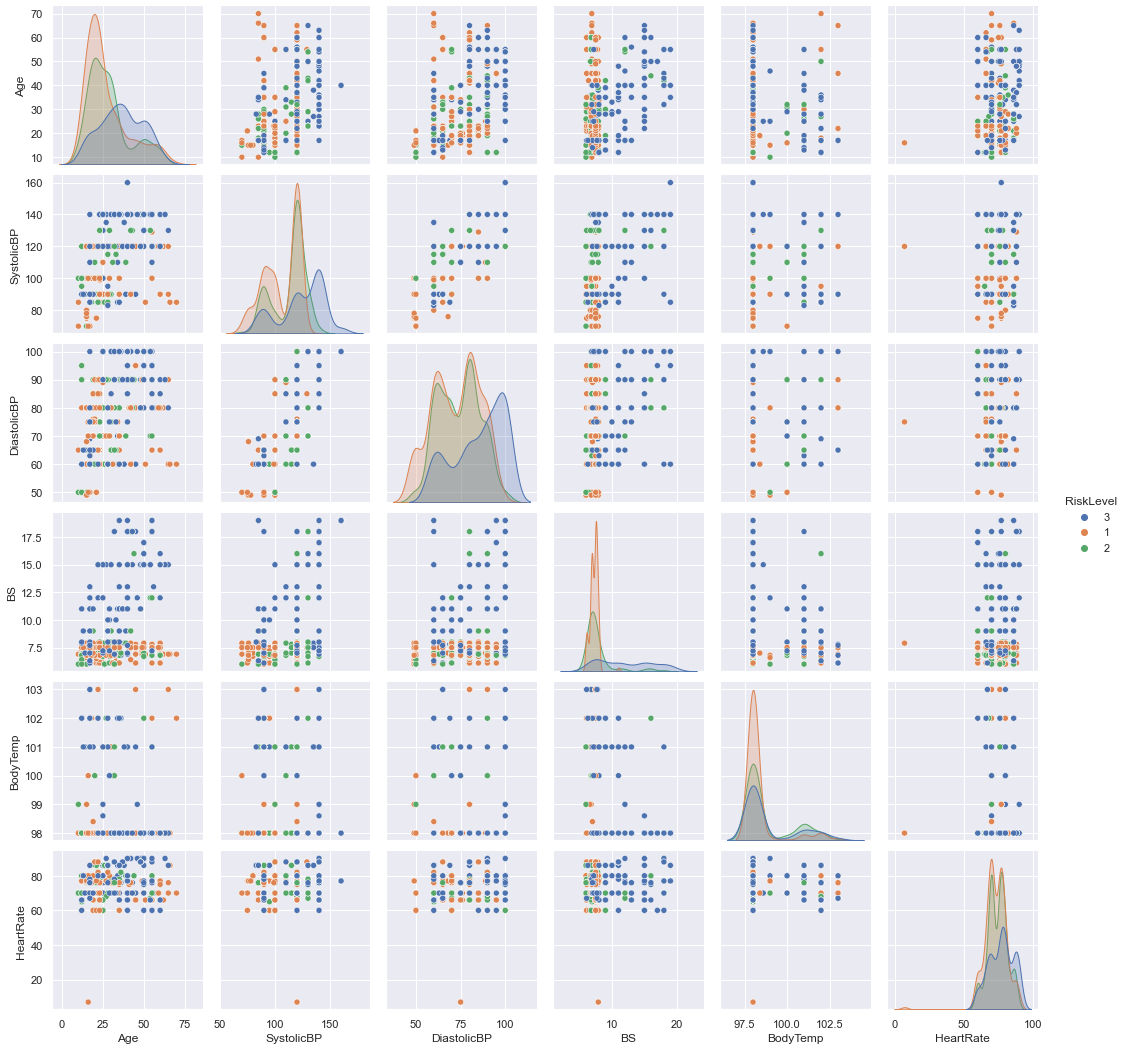

In [1977]:
# Multiple comparison plots of all attributes with the target to see the correlation
sns.pairplot(maternal,vars=['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'],hue='RiskLevel')

<AxesSubplot:>

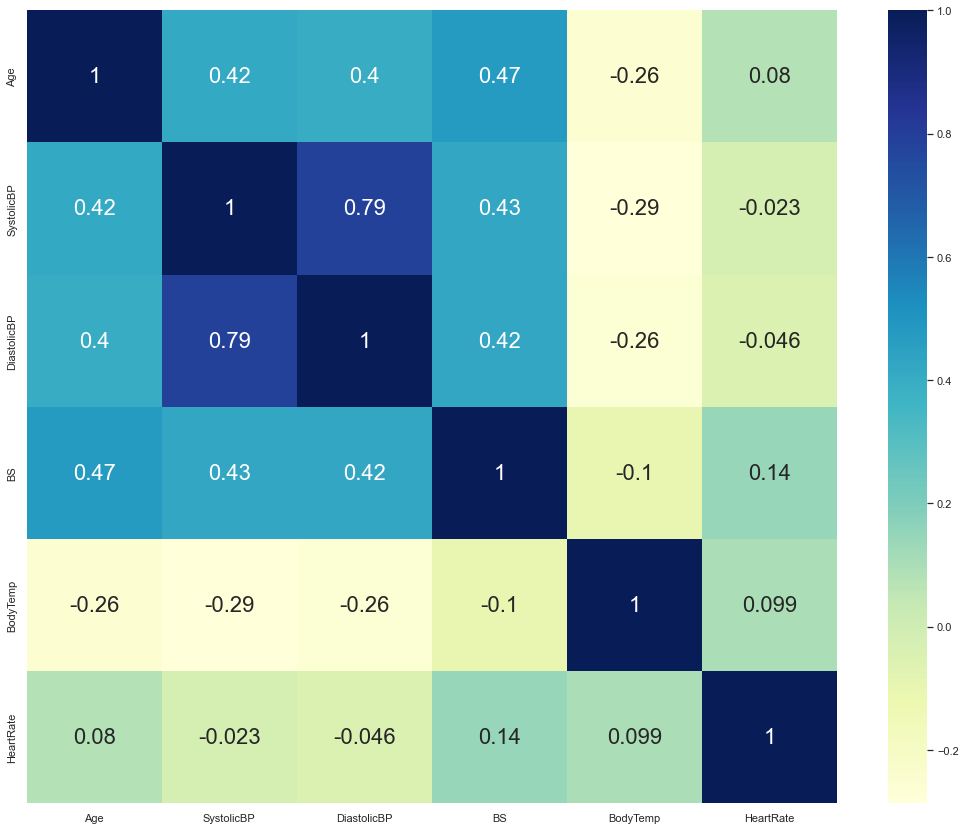

In [1978]:
# This matrix to see if some features are correlated between them
sns.heatmap(maternal.corr(method ='pearson'),cmap="YlGnBu", annot=True)

In [1979]:
# Create Train and Test data (Split them)
X = maternal.drop(['RiskLevel'], axis=1)
y = maternal.RiskLevel

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape, X_test.shape

y_test

985    3
842    2
581    1
453    1
710    2
      ..
68     2
376    1
323    1
103    3
895    1
Name: RiskLevel, Length: 305, dtype: object

In [1980]:
# Scaling between [0,1]
scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# # Standardization
# scaler = StandardScaler()
# scaled_X_train = scaler.fit_transform(X_train)
# scaled_X_test = scaler.transform(X_test)



In [1981]:
# Function for collecting the data of the clasification method to plot them

def plot_multiclass_roc(clf, scaled_X_test, y_test, n_classes, figsize=(3,3)):
    y_score = clf.decision_function(scaled_X_test)

    # Information
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Calculate the dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Make roc curve for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Roc Curve')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

C) Experiment

1) Support Vector Machine (SVM) Classification

In [1982]:
# SVM classification

# create a list to save the accuracy scores
acc = []

# create a loop to check the accuracy scores of all the four kernels
for kernel in ['linear','poly','rbf', 'sigmoid']:
 model = svm.SVC(kernel=kernel, degree=3)
 clf_SVM = model.fit(scaled_X_train, y_train)
 y_pred_SVM = clf_SVM.predict(X_test)
 acc.append(accuracy_score(y_test, y_pred_SVM))
 
 print(f'The accuracy of SVM with {kernel} is:{accuracy_score(y_test, y_pred_SVM)}')

The accuracy of SVM with linear is:0.29180327868852457
The accuracy of SVM with poly is:0.29180327868852457
The accuracy of SVM with rbf is:0.380327868852459
The accuracy of SVM with sigmoid is:0.380327868852459


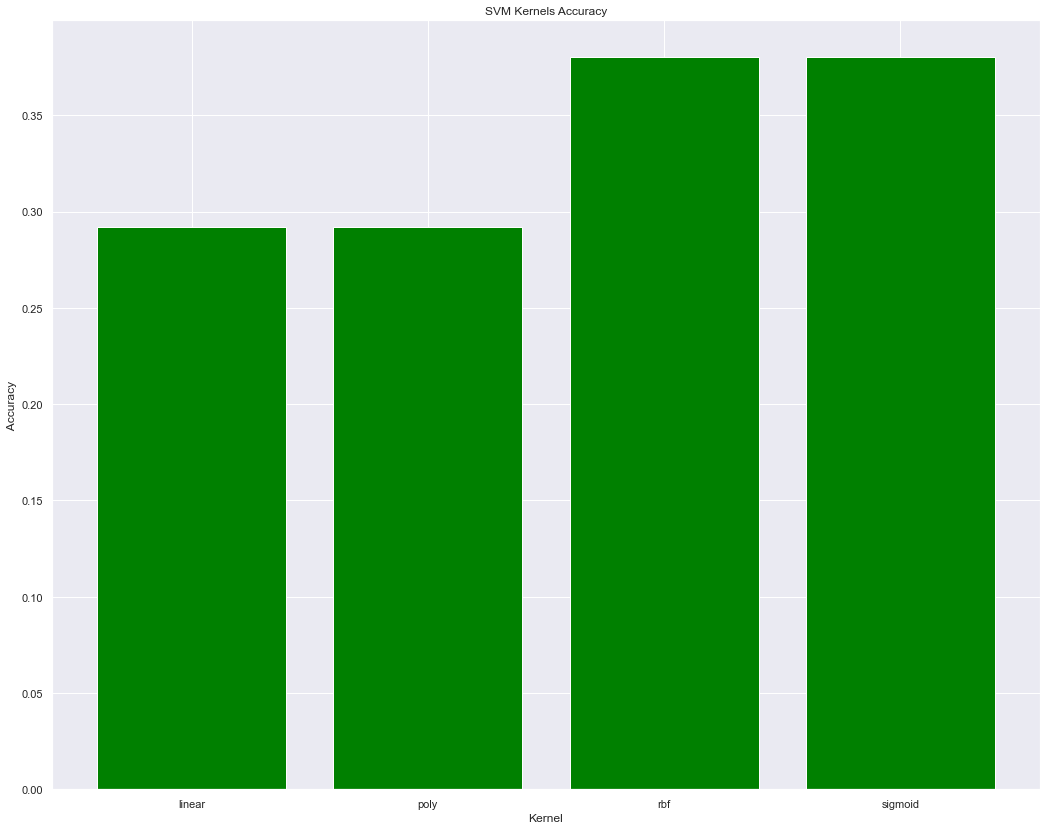

In [1983]:
# Plot the kernel's accuracy scores

ker = ['linear','poly','rbf', 'sigmoid']

plt.bar(ker, acc, color='green')
plt.xlabel("Kernel")
plt.ylabel(" Accuracy ")
plt.title("SVM Kernels Accuracy")
plt.show()

In [1984]:
# SVM try to find the optimal classification

clf_SVM = svm.SVC(kernel='sigmoid', degree=3, decision_function_shape = 'ovo', gamma = 'scale')
clf_SVM.fit(scaled_X_train, y_train)
y_pred_SVM = clf_SVM.predict(X_test)

svm_acc = accuracy_score(y_test, y_pred_SVM)
print(f'The accuracy of SVM with poly is:{svm_acc}')

print(classification_report(y_test, y_pred_SVM, zero_division = 0))

The accuracy of SVM with poly is:0.380327868852459
              precision    recall  f1-score   support

           1       0.38      1.00      0.55       116
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00        89

    accuracy                           0.38       305
   macro avg       0.13      0.33      0.18       305
weighted avg       0.14      0.38      0.21       305



2) AdaBoost

In [1985]:
# AdaBoost

ab = AdaBoostClassifier()
ab.fit(scaled_X_train, y_train)

y_pred_ab = ab.predict(scaled_X_test)

ab_acc = accuracy_score(y_test, y_pred_ab)
print('The accuracy of the test set is:',ab_acc)

The accuracy of the test set is: 0.6032786885245902


In [1986]:
# AdaBoost
# for loop from 1-500 find the optimal n-estimators


n_estimators = range(1,100)
max_acc = 0
list = []


for n in n_estimators:
    ab = AdaBoostClassifier(n_estimators = n)
    ab.fit(scaled_X_train, y_train)

    y_pred_ab = ab.predict(scaled_X_test)

    ab_acc = accuracy_score(y_test, y_pred_ab)

    list.append(ab_acc) 

print('For n =',(list.index(max(list))+1),'the accuracy of the test set is:', max(list))

For n = 4 the accuracy of the test set is: 0.6327868852459017


The accuracy of the test set is: 0.6032786885245902
              precision    recall  f1-score   support

           1       0.59      0.85      0.70       116
           2       0.44      0.31      0.36       100
           3       0.79      0.61      0.69        89

    accuracy                           0.60       305
   macro avg       0.61      0.59      0.58       305
weighted avg       0.60      0.60      0.59       305

The confusion matrix is:



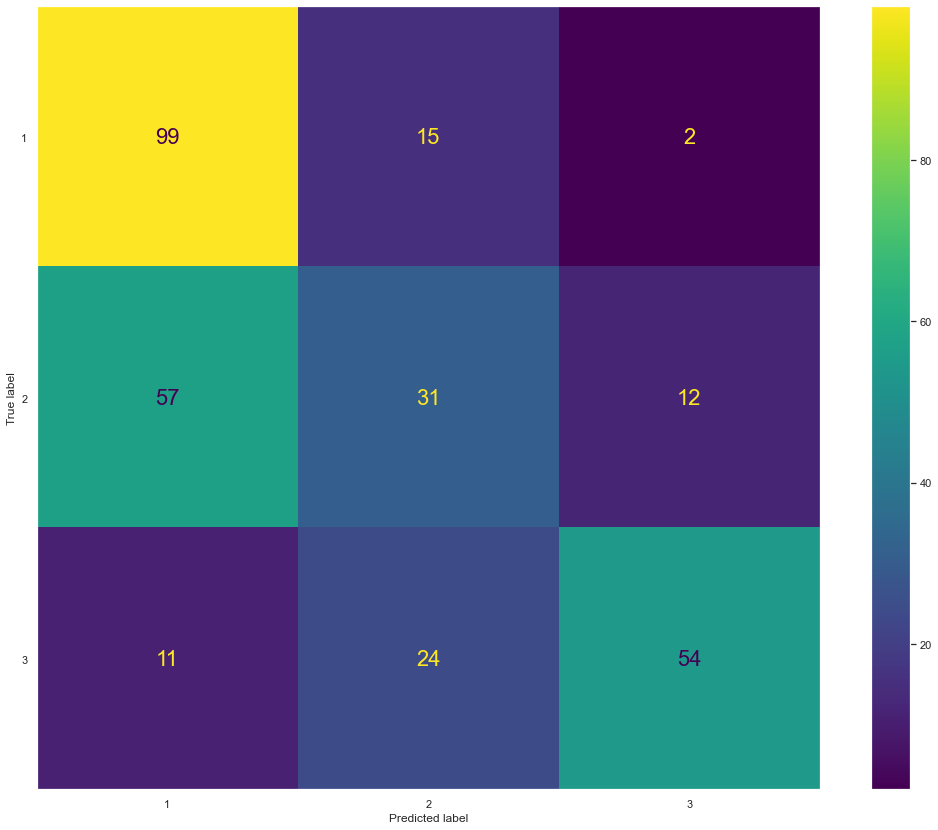

In [1987]:
# AdaBoost - Optimal

ab = AdaBoostClassifier(n_estimators = 28)
ab.fit(scaled_X_train, y_train)

y_pred_ab = ab.predict(scaled_X_test)

ab_acc = accuracy_score(y_test, y_pred_ab)
print('The accuracy of the test set is:',ab_acc)

print(classification_report(y_test, y_pred_ab))

# Create a confusion matrix
print('The confusion matrix is:\n')
plot_confusion_matrix(ab, scaled_X_test, y_test)
plt.grid(False)

3) kNN

In [1988]:
# KNN classification 

clf_knn = KNeighborsClassifier()
clf_knn.fit(scaled_X_train, y_train)
KNeighborsClassifier(n_neighbors=1)

# calculate the prediction of knn
y_pred_knn = clf_knn.predict(scaled_X_test)

# calculate the accuracy
knn_acc = accuracy_score(y_test, y_pred_knn)
print('The accuracy of the test set is:',knn_acc)

The accuracy of the test set is: 0.6655737704918033


In [1989]:
# kNN for loop to find the best n_neighbor (weights = "uniform")

# checks of 100 n_neighbors
n_neighbors = range(1,500)
# the maximum accuracy starts from 0
max_acc = 0
# create an empty list to save the accuracy scores
list = []
 
# Creating a for loop to find the optimal n_neighbors number with weights = "uniform"

for n in random_states:
    
  #Build a kNN model and train a test set
  classifier = KNeighborsClassifier(n_neighbors=n,weights = "uniform").fit(scaled_X_train,y_train) # k changes after each iteration
  # predict
  y_pred_knn = classifier.predict(scaled_X_test)
    
  knn_acc = metrics.accuracy_score(y_test, y_pred_knn)

  # save to a list all the accuracy scores
  list.append(knn_acc) 

# print the number of neighbors equals to the maximum accuracy score of the list
print('For n =',(list.index(max(list))+1),'the accuracy of the test set is:', max(list))

For n = 1 the accuracy of the test set is: 0.8032786885245902


In [1990]:
# kNN for loop to find the best n_neighbor (weights = "distance")

# checks of 100 n_neighbors
n_neighbors = range(1,500)
# the maximum accuracy starts from 0
max_acc = 0
# create an empty list to save the accuracy scores
list = []


# Creating a for loop to find the optimal n_neighbors number with weights = "distance" 

for n in random_states:
  classifier = KNeighborsClassifier(n_neighbors=n,weights = "distance").fit(scaled_X_train,y_train) # k changes after each iteration
  y_pred_knn = classifier.predict(scaled_X_test)
    
  knn_acc = metrics.accuracy_score(y_test, y_pred_knn)
  list.append(knn_acc) 

print('For n =',(list.index(max(list))+1),'the accuracy of the test set is:', max(list))

For n = 16 the accuracy of the test set is: 0.8098360655737705


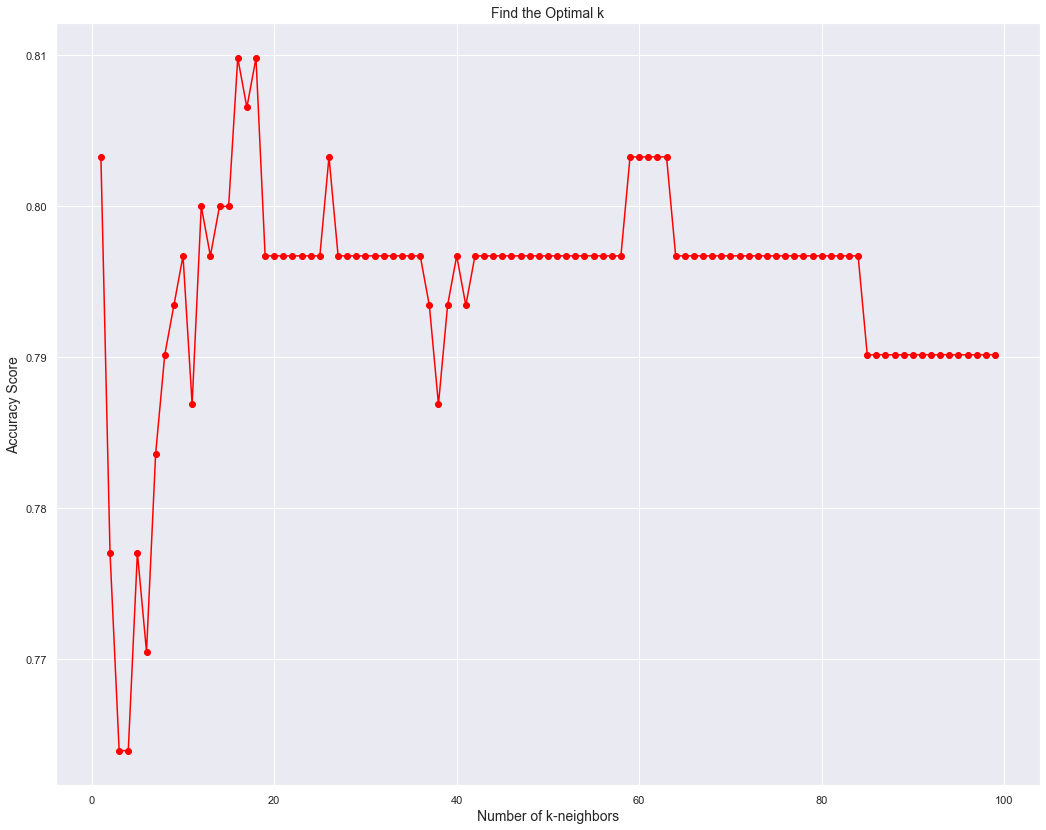

In [1991]:
# Search and Plot the optimal k

k_range = range(1, 100)
# create an empty list to save the accuracy scores
k_scores = []

# Create a loop to check multible accuracy scores based on k

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors=k,weights = "distance").fit(scaled_X_train,y_train)
    y_pred_knn = classifier.predict(scaled_X_test)
    scores = metrics.accuracy_score(y_test, y_pred_knn)
    k_scores.append(scores)

# Plot accuracy scores of each n_neighbor
plt.plot(k_range, k_scores, color='red', marker='o')
plt.title('Find the Optimal k', fontsize=14)
plt.xlabel('Number of k-neighbors', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.grid(True)
plt.show()


The classification report for the training set is: 
               precision    recall  f1-score   support

           1       0.80      0.80      0.80       116
           2       0.73      0.83      0.78       100
           3       0.92      0.78      0.84        89

    accuracy                           0.80       305
   macro avg       0.82      0.80      0.81       305
weighted avg       0.81      0.80      0.80       305

The accuracy of the test set is: 0.8032786885245902
The precision of the test set is: 0.8120885821110153
The f1 of the test set is: 0.8047879913455178
The confusion matrix is:



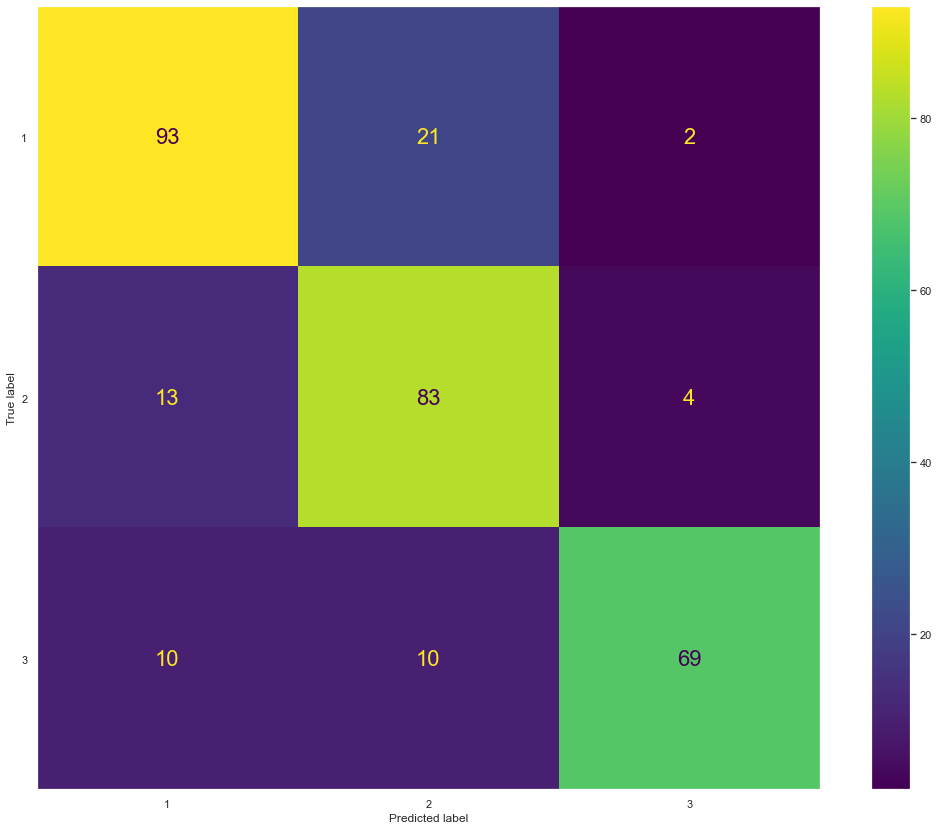

In [1992]:
# KNN classification - OPTIMAL

clf_knn = KNeighborsClassifier(n_neighbors=1,weights='distance')
clf_knn.fit(scaled_X_train, y_train)

y_pred = clf_knn.predict(scaled_X_test)


# Create a classification report
report_test = classification_report(y_test, y_pred)
print(f'The classification report for the training set is: \n {report_test}')

# Calculate the accuracy score
knn_acc = accuracy_score(y_test, y_pred)
print('The accuracy of the test set is:',knn_acc)

# Calculate the precision score
knn_prec = precision_score(y_test, y_pred, average = "weighted")
print('The precision of the test set is:',knn_prec)

# Calculate the f1 score
knn_f1 = f1_score(y_test, y_pred, average = "weighted")
print('The f1 of the test set is:',knn_f1)


# Create a confusion matrix
print('The confusion matrix is:\n')
plot_confusion_matrix(clf_knn, scaled_X_test, y_test)
plt.grid(False)



4) Random Forest Classification

In [1993]:
# Random Forest

# Build a Random Forest classification model
rf = RandomForestClassifier()
rf.fit(scaled_X_train, y_train)

y_pred_rf = rf.predict(scaled_X_test)

# Calculate the accuracy score
rf_acc = accuracy_score(y_test, y_pred_rf)
print('The accuracy of the test set is:',rf_acc)

# Create a classification report
print(classification_report(y_test, y_pred_rf, zero_division = 0))


The accuracy of the test set is: 0.8032786885245902
              precision    recall  f1-score   support

           1       0.78      0.84      0.80       116
           2       0.75      0.79      0.77       100
           3       0.93      0.78      0.85        89

    accuracy                           0.80       305
   macro avg       0.82      0.80      0.81       305
weighted avg       0.81      0.80      0.80       305



In [1994]:
#  Random Forest
# for loop for random_state 1-50  

random_states = range(1,51)
max_acc = 0
list = []

# Loop through the model to find the optimal random state

for r in random_states:
    rf = RandomForestClassifier(random_state = r)
    rf.fit(scaled_X_train, y_train)

    y_pred_rf = rf.predict(scaled_X_test)

    rf_acc = accuracy_score(y_test, y_pred_rf)

    list.append(rf_acc) 

print('For r =',(list.index(max(list))+1),'the accuracy of the test set is:', max(list))

For r = 36 the accuracy of the test set is: 0.8229508196721311


The accuracy of the test set is: 0.8163934426229508
The precision of the test set is: 0.8120885821110153
The f1 of the test set is: 0.8047879913455178
              precision    recall  f1-score   support

           1       0.79      0.85      0.82       116
           2       0.76      0.81      0.79       100
           3       0.93      0.78      0.85        89

    accuracy                           0.82       305
   macro avg       0.83      0.81      0.82       305
weighted avg       0.82      0.82      0.82       305

The confusion matrix is:



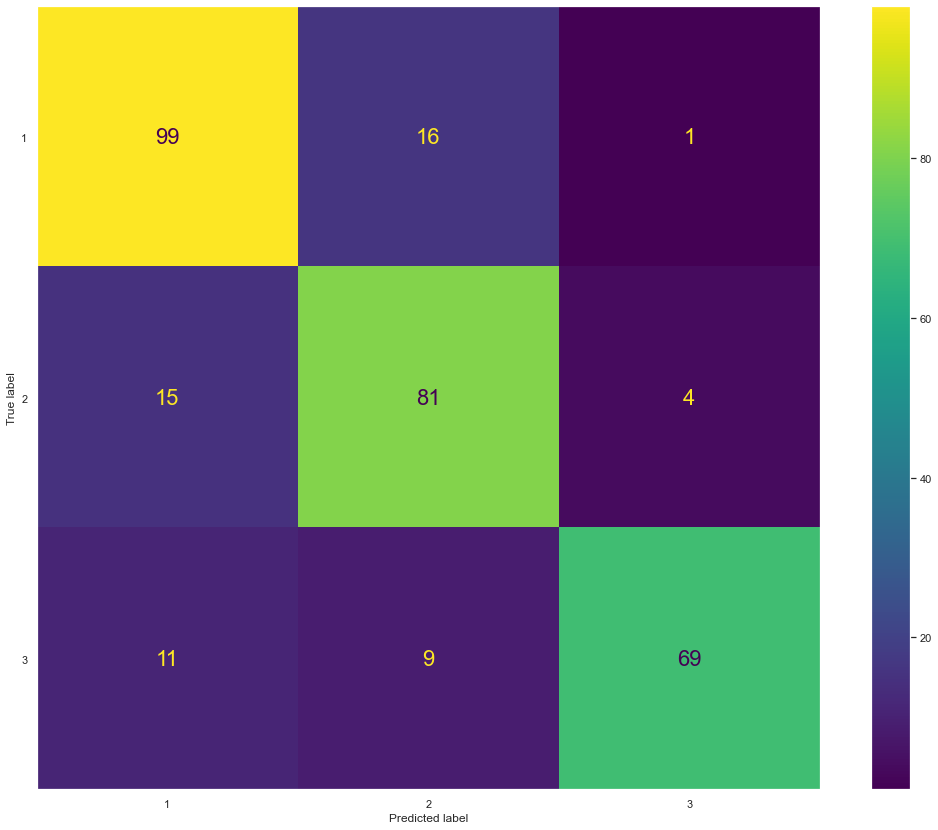

In [1995]:
# Random Forest - OPTIMAL

rf = RandomForestClassifier(random_state = 7)
rf.fit(scaled_X_train, y_train)

y_pred_rf = rf.predict(scaled_X_test)

rf_acc = accuracy_score(y_test, y_pred_rf)
print('The accuracy of the test set is:',rf_acc)

# Calculate the precision score
rf_prec = precision_score(y_test, y_pred, average = "weighted")
print('The precision of the test set is:',rf_prec)

# Calculate the f1 score
rf_f1 = f1_score(y_test, y_pred, average = "weighted")
print('The f1 of the test set is:',rf_f1)

print(classification_report(y_test, y_pred_rf, zero_division = 0))

# Create a confusion matrix
print('The confusion matrix is:\n')
plot_confusion_matrix(rf, scaled_X_test, y_test)
plt.grid(False)

5) Decision Tree

In [1996]:
# Decision Tree

# Build a Decision Tree model
dt = tree.DecisionTreeClassifier()
dt.fit(scaled_X_train, y_train)

y_pred_dt = dt.predict(scaled_X_test)

dt_acc = accuracy_score(y_test, y_pred_dt)
print('The accuracy of the test set is:',dt_acc)


The accuracy of the test set is: 0.7737704918032787


In [1997]:
# Decision Tree
# for loop for random_state 1-500 and criterion='gini' 

random_states = range(1,501)
list = []

# Build a for loop to find the optimal random state number with criterion='gini'
 
for j in random_states:
  dt = tree.DecisionTreeClassifier(criterion='gini', max_features = 'auto',
                                   random_state = j,splitter = 'best')
  dt.fit(scaled_X_train, y_train)

  y_pred_dt = dt.predict(scaled_X_test)

  dt_acc = accuracy_score(y_test, y_pred_dt)
  list.append(dt_acc) 

print('For j =',(list.index(max(list))+1),'the accuracy of the test set is:', max(list))


For j = 390 the accuracy of the test set is: 0.8229508196721311


In [1998]:
# Decision Tree
# for loop for random_state 1-500 and criterion='entropy' 

random_states = range(1,501)
list = []

# Build a for loop to find the optimal random state number with criterion='entropy'

for j in random_states:
  dt = tree.DecisionTreeClassifier(criterion='entropy', max_features = 'auto',
                                   random_state = j,splitter = 'best')
  dt.fit(scaled_X_train, y_train)

  y_pred_dt = dt.predict(scaled_X_test)

  dt_acc = accuracy_score(y_test, y_pred_dt)
  list.append(dt_acc) 

print('For j =',(list.index(max(list))+1),'the accuracy of the test set is:', max(list))



For j = 354 the accuracy of the test set is: 0.8229508196721311


The classification report for the training set is: 
               precision    recall  f1-score   support

           1       0.78      0.81      0.80       116
           2       0.68      0.77      0.72       100
           3       0.93      0.74      0.82        89

    accuracy                           0.78       305
   macro avg       0.80      0.77      0.78       305
weighted avg       0.79      0.78      0.78       305

The accuracy of the test set is: 0.7770491803278688
The precision of the test set is: 0.8120885821110153
The f1 of the test set is: 0.8047879913455178
The confusion matrix is:



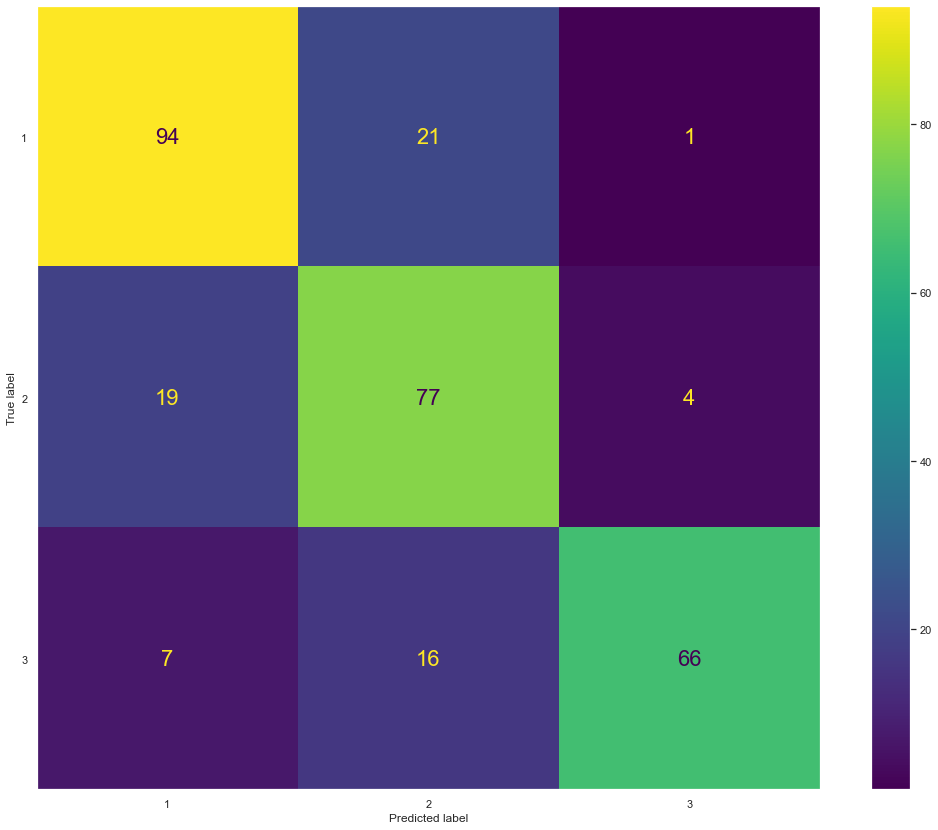

In [1999]:
# Decision Tree - OPTIMAL

dt = tree.DecisionTreeClassifier(criterion='entropy', max_features = 'auto',
                                   random_state = 50,splitter = 'best')
dt.fit(scaled_X_train, y_train)

y_pred_dt = dt.predict(scaled_X_test)

dt_acc = accuracy_score(y_test, y_pred_dt)


report_test = classification_report(y_test, y_pred_dt)
print(f'The classification report for the training set is: \n {report_test}')


dt_acc = accuracy_score(y_test, y_pred_dt)
print('The accuracy of the test set is:',dt_acc)

dt_prec = precision_score(y_test, y_pred, average = "weighted")
print('The precision of the test set is:',dt_prec)

dt_f1 = f1_score(y_test, y_pred, average = "weighted")
print('The f1 of the test set is:',dt_f1)


# Create a confusion matrix
print('The confusion matrix is:\n')
plot_confusion_matrix(dt, scaled_X_test, y_test)
plt.grid(False)

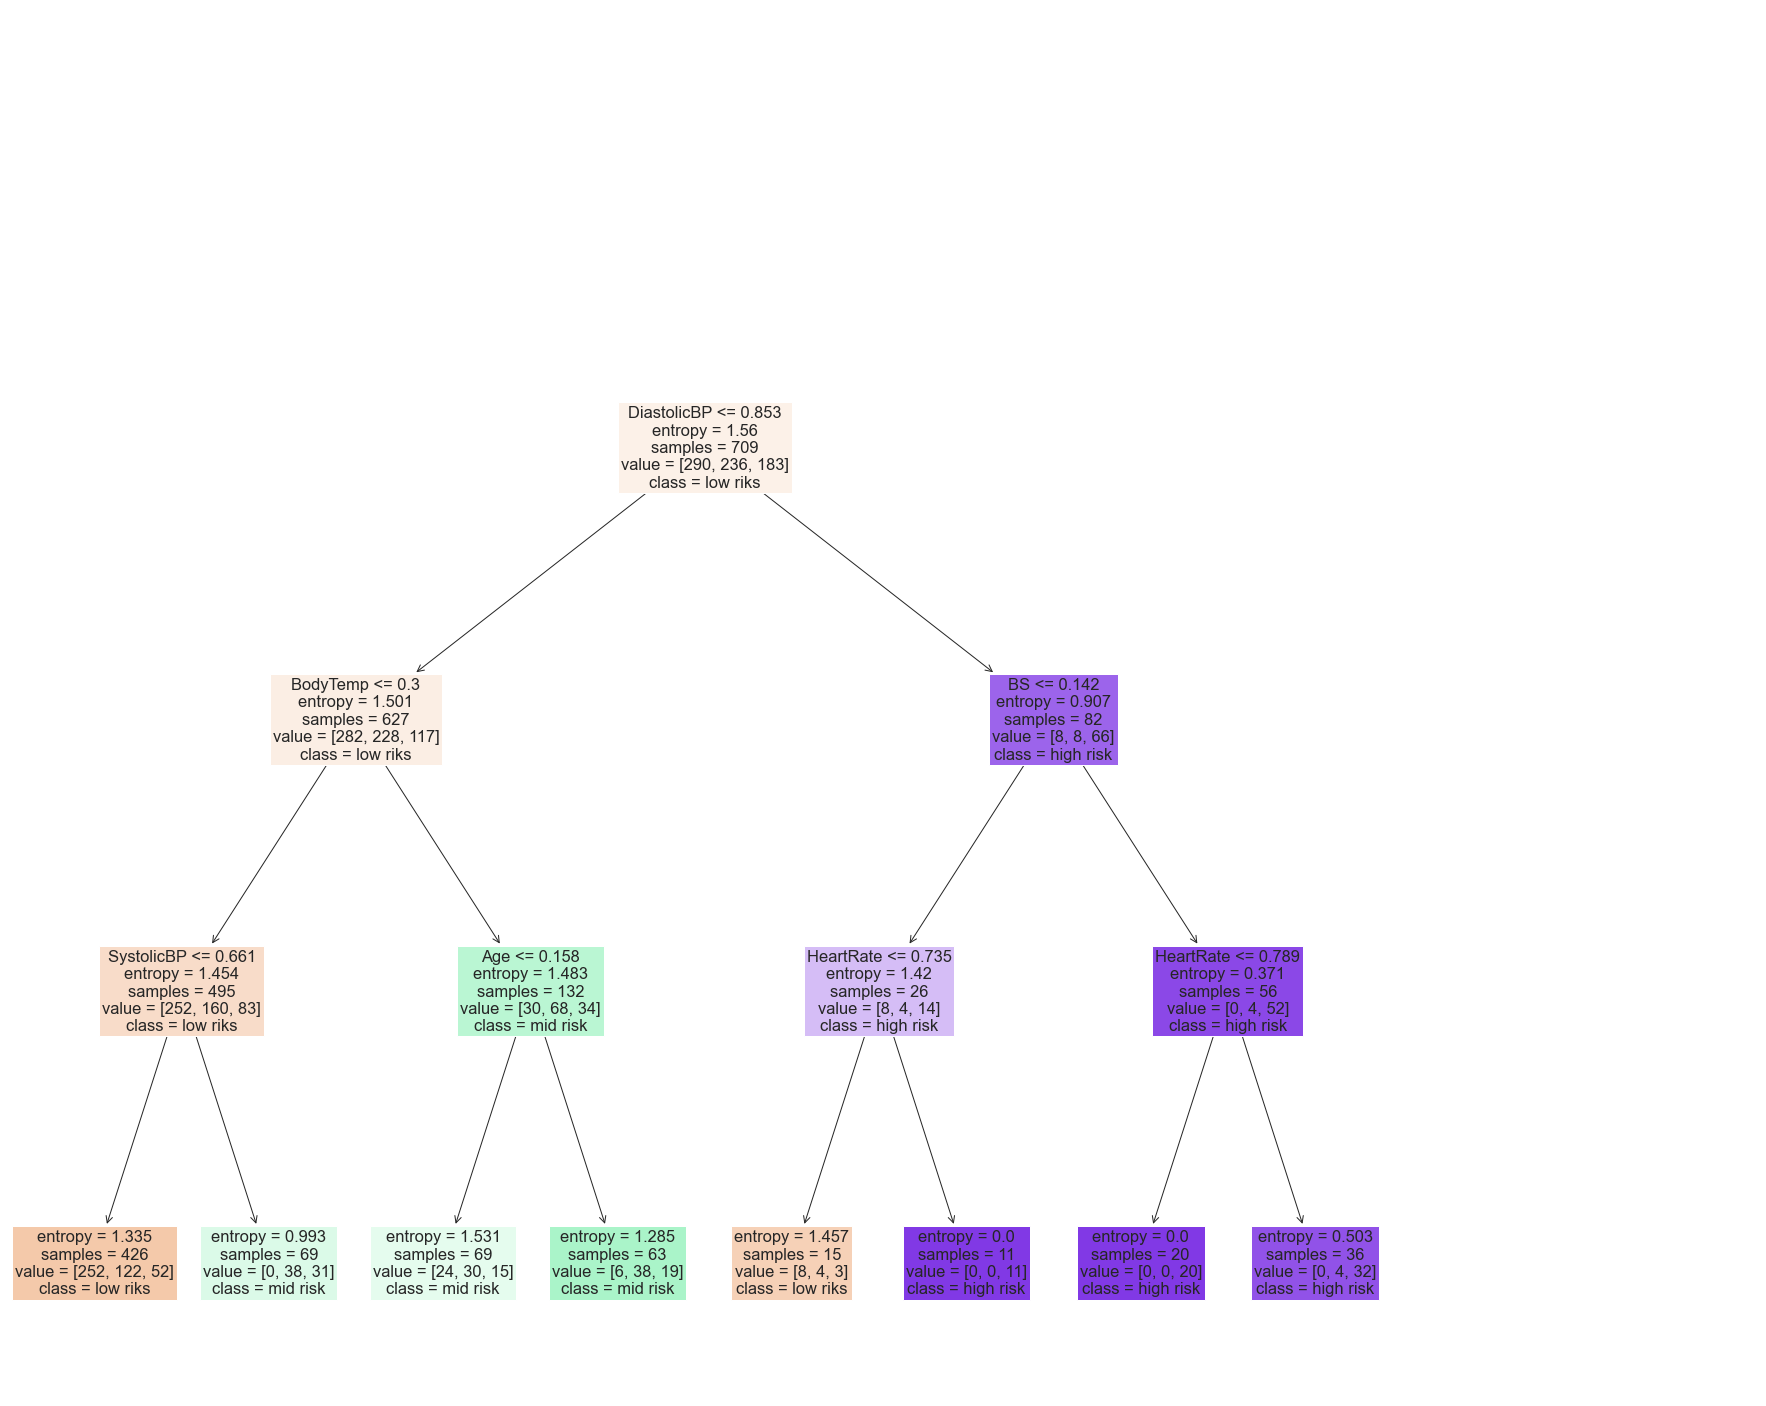

In [2000]:
# Decision Tree - Plot 

# Build and plot the decision tree with maximum depth = 3
dt = tree.DecisionTreeClassifier(criterion='entropy', max_features = 'auto',
                                   random_state = 50,splitter = 'best',max_depth=3)
dt.fit(scaled_X_train, y_train)
y_pred_dt = dt.predict(scaled_X_test)
dt_acc = accuracy_score(y_test, y_pred_dt)


fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
 feature_names=['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'],
 class_names=['low riks', 'mid risk', 'high risk'],
 filled=True)

6) Gradient Boost

In [2001]:
# Gradient Boost

gb = GradientBoostingClassifier()
gb.fit(scaled_X_train, y_train)

y_pred_gb = gb.predict(scaled_X_test)

gb_acc = accuracy_score(y_test, y_pred_gb)
print('The accuracy of the test set is:',gb_acc)

The accuracy of the test set is: 0.7573770491803279


In [2002]:
# for loop from 1-500 find the optimal n-estimators


learning_rate = range(1,100)
max_acc = 0
list = []

# Create a loop to find the optimal learning rate

for n in n_estimators:
    gb = GradientBoostingClassifier(learning_rate = n )
    gb.fit(scaled_X_train, y_train)

    y_pred_gb = gb.predict(scaled_X_test)

    gb_acc = accuracy_score(y_test, y_pred_gb)
    list.append(gb_acc) 

print('For n =',(list.index(max(list))+1),'the accuracy of the test set is:', max(list))

For n = 1 the accuracy of the test set is: 0.8065573770491803


In [2003]:
# for loop from 1-500 find the optimal n-estimators


n_estimators = range(1,100)
max_acc = 0
list = []

# Create a loop to find the optimal n_estimators

for n in n_estimators:
    gb = GradientBoostingClassifier(learning_rate = 1 ,n_estimators = n)
    gb.fit(scaled_X_train, y_train)

    y_pred_gb = gb.predict(scaled_X_test)

    gb_acc = accuracy_score(y_test, y_pred_gb)
    list.append(gb_acc) 

print('For n =',(list.index(max(list))+1),'the accuracy of the test set is:', max(list))

For n = 18 the accuracy of the test set is: 0.8131147540983606


The classification report for the training set is: 
               precision    recall  f1-score   support

           1       0.80      0.84      0.82       116
           2       0.74      0.81      0.78       100
           3       0.93      0.78      0.85        89

    accuracy                           0.81       305
   macro avg       0.82      0.81      0.81       305
weighted avg       0.82      0.81      0.81       305

The accuracy of the test set is: 0.8098360655737705
The precision of the test set is: 0.8120885821110153
The f1 of the test set is: 0.8047879913455178
The confusion matrix for the training set is:



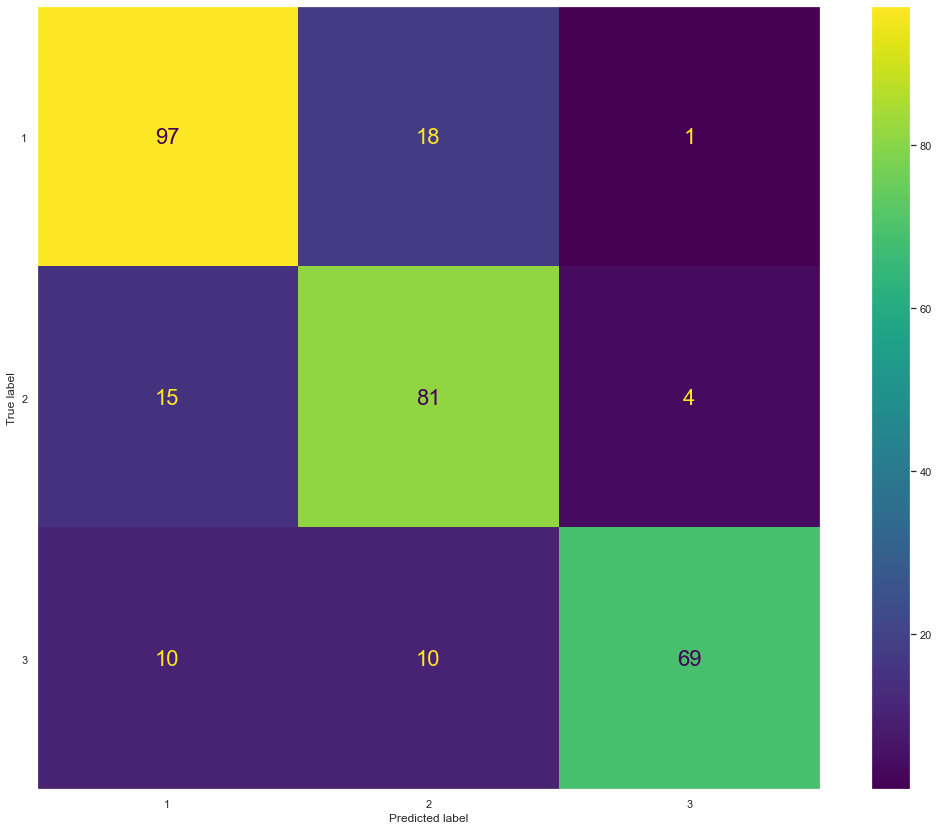

In [2004]:
# Gradient Boost

gb = GradientBoostingClassifier(n_estimators = 47 ,learning_rate = 1, loss = 'deviance')
gb.fit(scaled_X_train, y_train)

y_pred_gb = gb.predict(scaled_X_test)

gb_acc = accuracy_score(y_test, y_pred_gb)



report_test = classification_report(y_test, y_pred_gb)
print(f'The classification report for the training set is: \n {report_test}')


gb_acc = accuracy_score(y_test, y_pred_gb)
print('The accuracy of the test set is:',gb_acc)

gb_prec = precision_score(y_test, y_pred, average = "weighted")
print('The precision of the test set is:',gb_prec)

gb_f1 = f1_score(y_test, y_pred, average = "weighted")
print('The f1 of the test set is:',gb_f1)

print('The confusion matrix for the training set is:\n')
plot_confusion_matrix(gb, scaled_X_test, y_test)
plt.grid(False)


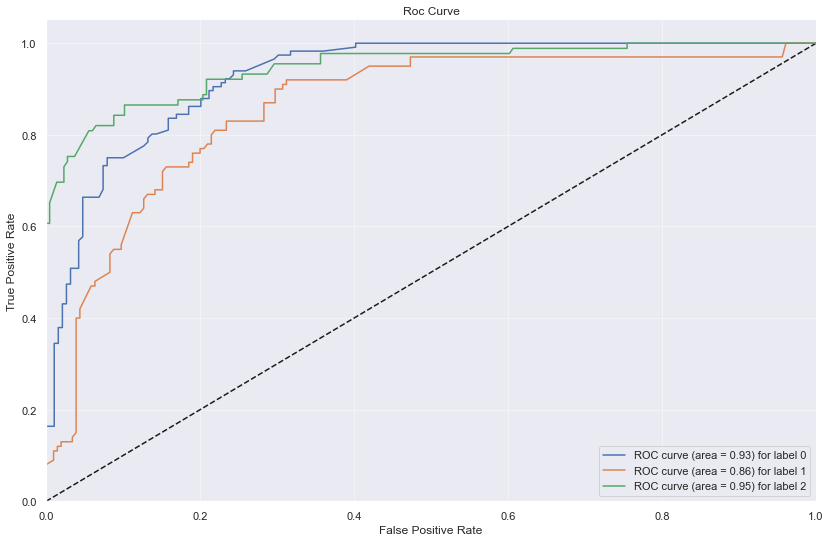

In [2005]:
# Plot the roc curve for all three classes
plot_multiclass_roc(gb, scaled_X_test, y_test, n_classes = 3, figsize=(12,8))

D) Reflection

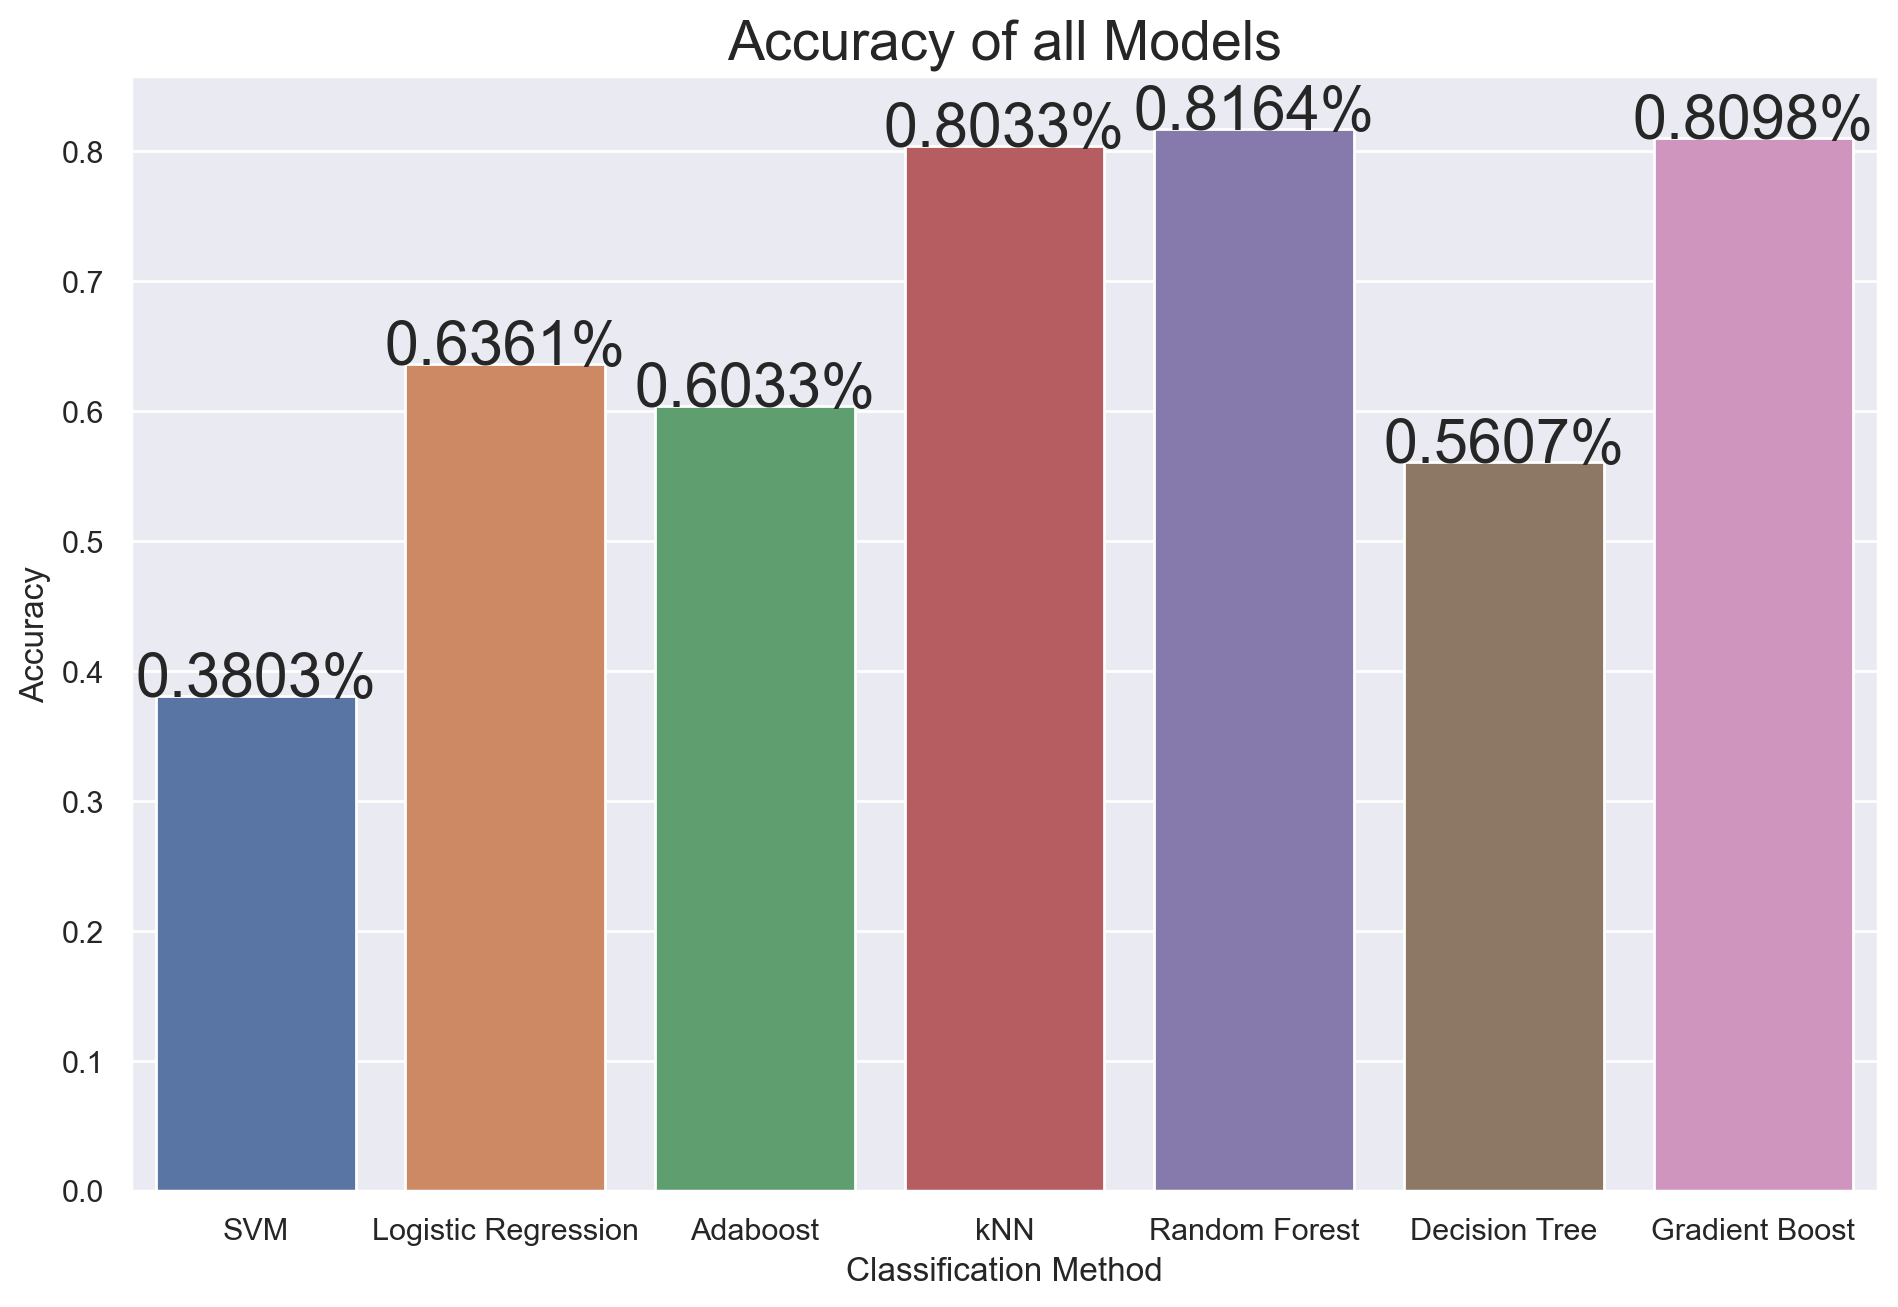

In [2006]:
# Plot the optimal accuracy scoores of all methods

clf_models = ["SVM","Logistic Regression", "Adaboost" ,"kNN", "Random Forest", "Decision Tree","Gradient Boost"]
accuracies = [svm_acc,lg_acc,ab_acc,knn_acc,rf_acc, dt_acc,gb_acc ]

plt.figure(figsize=(10,7), dpi=200)
ax = sns.barplot(x=clf_models, y=accuracies)
plt.title("Accuracy of all Models",fontsize =20)
plt.xlabel('Classification Method')
plt.ylabel("Accuracy")
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,4)}%', (x + width/2, y + height*1.00), ha='center')
plt.show()
